# Classify Leads
## Machine Learning 

This notebook includes:

1. Data oversampling
2. Model building
3. Model tuning

----
## Data Oversampling

oversampling the minority class

In [17]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scikit-learn>=1.1.0 (from imbalanced-learn) (from versions: 0.9, 0.10, 0.11, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.14.1, 0.15.0b1, 0.15.0b2, 0.15.0, 0.15.1, 0.15.2, 0.16b1, 0.16.0, 0.16.1, 0.17b1, 0.17, 0.17.1, 0.18, 0.18.1, 0.18.2, 0.19b2, 0.19.0, 0.19.1, 0.19.2, 0.20rc1, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.20.4, 0.21rc2, 0.21.0, 0.21.1, 0.21.2, 0.21.3, 0.22rc2.post1, 0.22rc3, 0.22, 0.22.1, 0.22.2, 0.22.2.post1, 0.23.0rc1, 0.23.0, 0.23.1, 0.23.2, 0.24.dev0, 0.24.0rc1, 0.24.0, 0.24.1, 0.24.2, 1.0rc1, 1.0rc2, 1.0, 1.0.1, 1.0.2)
ERROR: No matching distribution found for scikit-learn>=1.1.0 (from imbalanced-learn)
You should consider upgrading via the 'C:\Users\EL7md\anaconda3\python.exe -m pip install --upgrade pip' command.


In [24]:
conda install -c conda-forge imbalanced-learn


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\EL7md\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.5.18.1|       h5b45459_0         180 KB  conda-forge
    certifi-2022.5.18.1        |   py37h03978a9_0         151 KB  conda-forge
    conda-4.13.0               |   py37h03978a9_1        1001 KB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    openssl-1.1.1l             |       h8ffe710_0         5.7 MB  conda-forge
    python_abi-3.7             |          2_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         7.1 MB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanc



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda


WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(144): Could not remove or rename C:\Users\EL7md\anaconda3\pkgs\torchvision-0.3.0-py37_cu100_1.tar.bz2.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(144): Could not remove or rename C:\Users\EL7md\anaconda3\pkgs\torchvision-0.3.0-py37_cu100_1\info\test\test\sanity_checks.ipynb.  Please remove this file manually (you may need to reboot to free file handles)


In [13]:
# import libraries
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import AdaBoostClassifier
import visuals as vs
import matplotlib as plt
from collections import Counter

In [2]:
# load the data from database
engine=create_engine('sqlite:///nawytransformed.db')
df=pd.read_sql_table('nawytransformed', con=engine)
df.head()

,low_qualified,day,month,year,hour,answer,apartment,background,best_time_to_call,called,...,campaign_village west oms,campaign_vresidence,campaign_vye,campaign_vye bedroom,campaign_webretargeting,campaign_zed,campaign_zed east,campaign_zed east a b testing lead generation,campaign_zed west,campaign_zedeastsms
0,0,7,3,2022,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,16,9,2019,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,7,5,2022,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,19,12,2019,22,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,27,1,2022,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# split the dataset into training and testing sets
df_train = df.head(56075)
df_test = df.tail(14019)

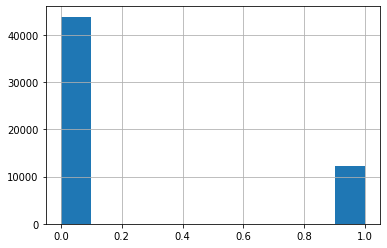

In [4]:
# visualize low_qualified column for train data
df_train['low_qualified'].hist()

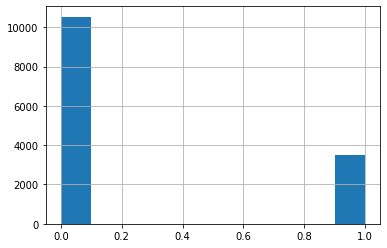

In [5]:
# visualize low_qualified column for test data
df_test['low_qualified'].hist()

In [6]:
# split the data to x any y
y_train=df_train['low_qualified']
x_train=df_train.drop('low_qualified',axis=1)
y_test=df_test['low_qualified']
x_test=df_test.drop('low_qualified',axis=1)

In [7]:
# oversample the train data
oversample=SMOTE()
X,y=oversample.fit_resample(x_train,y_train)

In [14]:
# check the number of data in the two classes
counter=Counter(y)
for k,v in counter.items():
    dist=v/len(y)*100
    print(f"class={k},n={v}")

class=0,n=43919
class=1,n=43919


In [8]:
X.shape

(87838, 548)

In [9]:
y.shape

(87838,)

## Model Building


In [10]:
# fit XGboost classifer to the training resample data
model = XGBClassifier()
model.fit(X, y)

C:\Users\EL7md\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:36:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
# make predictions for test data
y_pred = model.predict(x_test)

In [12]:
#calculate F1 score
f1_score(y_test, y_pred)


0.46737782188042665

> the f1_score is approx. 0.47 which is not good

In [13]:
# fit adaboost classifer to the training resample data
model2 = AdaBoostClassifier()
model2.fit(X, y)

AdaBoostClassifier()

In [14]:
# make predictions for test data
y_pred = model2.predict(x_test)

In [15]:
#calculate F1 score
f1_score(y_test, y_pred)

0.4310720335565056

> tried adaboost but its lower than XGboost

## Model Tuning


In [15]:
# Extract the feature importances using feature_importances_ 
importances = model.feature_importances_

In [29]:
indices = np.argsort(importances)[::-1]
important_features = X.columns.values[indices[:5]]

In [30]:
important_features

array(['campaign_none', 'campaign_north edge google auto',
       'campaign_sodic lead generation new cooing',
       'campaign_emaar lead generation cooing new',
       'campaign_emaar lead generation cooing'], dtype=object)

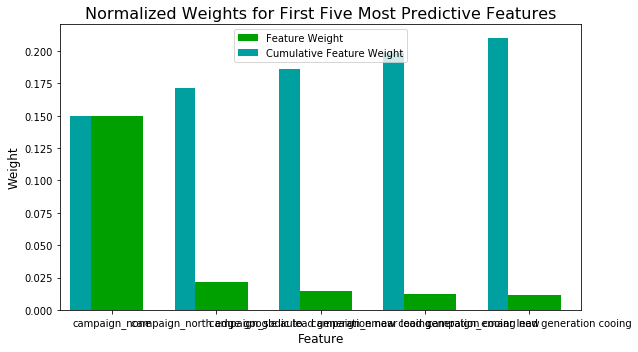

In [31]:
# Plot
vs.feature_plot(importances, X, y)

In [32]:
# Reduce the feature space
X_train_reduced = X[X.columns.values[indices[:5]]]
X_test_reduced = x_test[x_test.columns.values[indices[:5]]]

In [33]:
# fit the tuned model
tuned_model=model.fit(X_train_reduced, y)
# Make new predictions
reduced_predictions = tuned_model.predict(X_test_reduced)
#calculate F1 score
f1_score(y_test, reduced_predictions)

C:\Users\EL7md\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.45953118089341

> tried feature importance to reduce features but f1 score is still small